In [1]:
# IMPORTS
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.io as sio
import GDI
import seaborn as sns

plt.rcParams.update({'font.size': 14});

/Users/joe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# PARAMETERS
M           = 3
bin_width   = 50
boot_iter   = 5

In [3]:
# LOAD CPG SPIKES (BINNED AT 0.2 ms RESOLUTION)
binned_spikes = sio.loadmat('cpg.mat')['spike_times_binned']
time = sio.loadmat('cpg.mat')['time'][0,:]
time_max = np.max(time)
neuron_names = ["CBI2","B4","B8","B20","B30","B31a","B34","B40",
                "B51a","B52","B63","B64a","B65"]

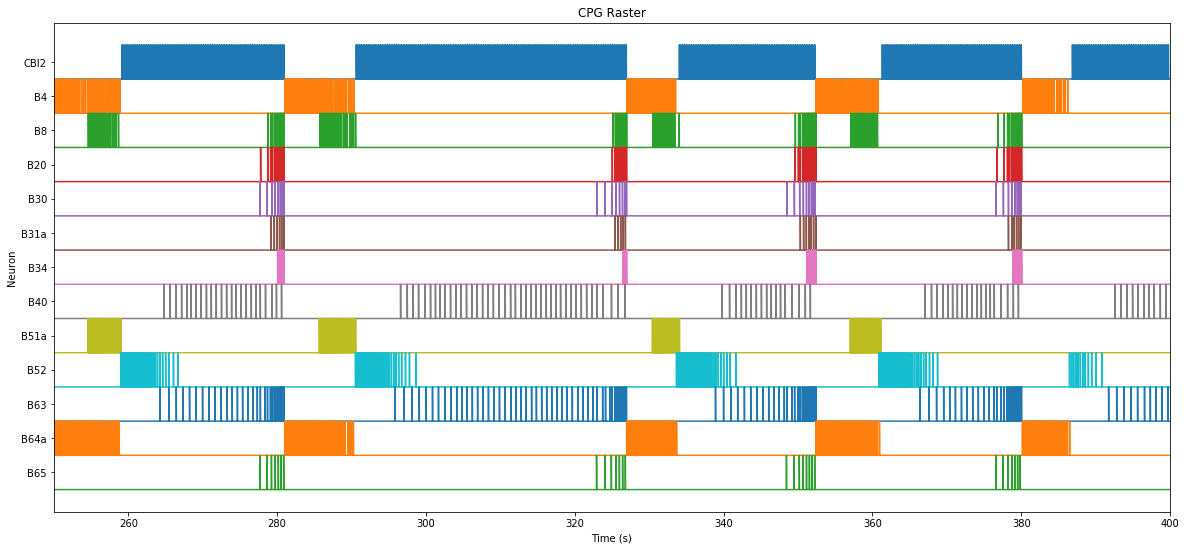

In [4]:
# PLOT binned_spikes
f, ax = plt.subplots(figsize=(20, 9));
for ii in range(binned_spikes.shape[1]):
    plt.plot(time, ii+1.5-binned_spikes[:,ii], label='Neuron = %i'%(ii+1));

plt.xlim((250,400));
plt.xlabel('Time (s)');
plt.ylabel('Neuron');
plt.gca().invert_yaxis();
plt.yticks(np.arange(binned_spikes.shape[1])+1,neuron_names);
plt.title('CPG Raster');

In [5]:
# FURTHER BIN SPIKE TIMES
num_bins = np.ceil(time_max/(bin_width*0.001))
range_max = num_bins*(bin_width*0.001)
further_binned_spikes = np.zeros((int(num_bins),binned_spikes.shape[1]))
for ii in range(binned_spikes.shape[1]):
    further_binned_spikes[:,ii], time_further_binned = np.histogram(time[binned_spikes[:,ii].astype(bool)],
                     bins=np.arange(0,range_max+((bin_width*0.001)/2),(bin_width*0.001)))

# CAP BINS TO 1 SPIKE
further_binned_spikes[further_binned_spikes>0]=1

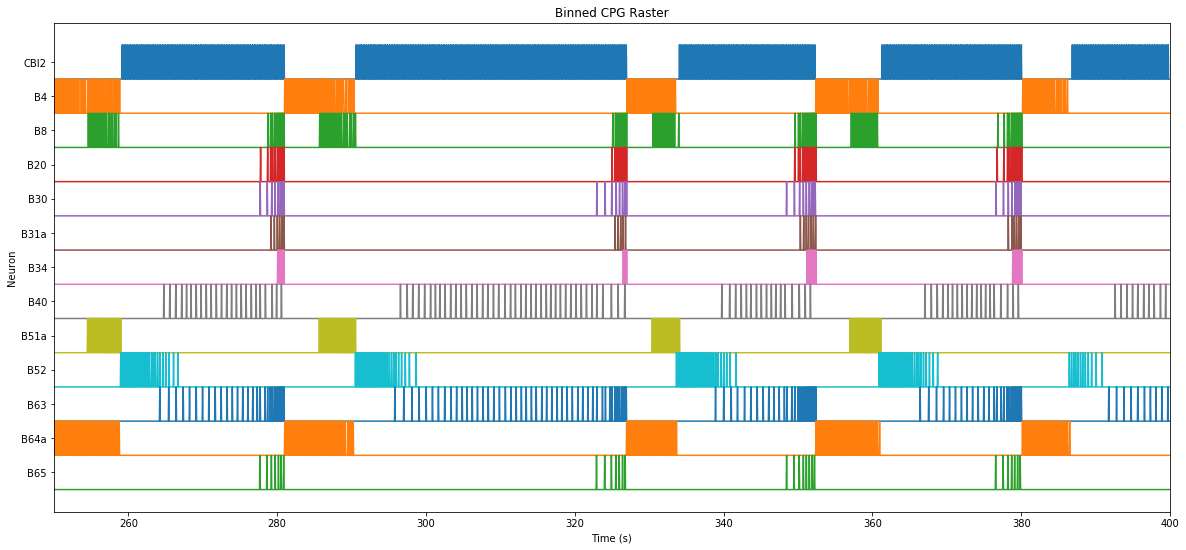

In [6]:
# PLOT further_binned_spikes
f, ax = plt.subplots(figsize=(20, 9))
for ii in range(further_binned_spikes.shape[1]):
    plt.plot(time_further_binned[:-1]+((bin_width*0.001)/2), ii+1.5-further_binned_spikes[:,ii])

plt.xlim((250,400));
plt.xlabel('Time (s)');
plt.ylabel('Neuron');
plt.gca().invert_yaxis();
plt.yticks(np.arange(binned_spikes.shape[1])+1,neuron_names);
plt.title('Binned CPG Raster');

In [7]:
# LOAD NORMALIZATION
HMatrix = sio.loadmat('cpg.mat')['HMatrix']

DI_est  = GDI.DI(further_binned_spikes,M,boot_iter)
DI_est_norm = DI_est*(1/np.log(2))/HMatrix
DI_est_norm[DI_est_norm<0.01] = 0

GDI_est = GDI.GDI_mask(further_binned_spikes,M,boot_iter,DI_est_norm>0)
GDI_est_norm = GDI_est*(1/np.log(2))/HMatrix
GDI_est_norm[GDI_est_norm<0]=0

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


W0928 15:15:44.312190 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan



W0928 15:15:44.318665 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan


W0928 15:15:44.317477 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


W0928 15:15:44.331591 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


Tester = Classifier, metric = donsker_varadhan


W0928 15:15:44.327538 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan


W0928 15:15:44.332165 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0928 15:15:44.339617 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 15:15:44.340922 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.




Tester = Classifier, metric = donsker_varadhan




W0928 15:15:44.344141 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0928 15:15:44.348066 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0928 15:15:44.355672 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0928 15:15:44.356937 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 15:15:44.354821 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W

W0928 15:15:45.325229 4483055040 deprecation.py:323] From /Users/joe/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

W0928 15:15:45.335075 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.

W0928 15:15:45.341696 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0928 15:15:45.345659 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Clas

/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


W0928 15:23:02.705125 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0928 15:23:02.705971 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0928 15:23:02.705229 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan



W0928 15:23:02.710495 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.



Tester = Classifier, metric = donsker_varadhan



W0928 15:23:02.715976 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.



Tester = Classifier, metric = donsker_varadhan


W0928 15:23:02.726433 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0928 15:23:02.726708 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0928 15:23:02.727807 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0928 15:23:02.720559 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0928 15:23:02.730150 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0928 15:23:02.72

Use tf.where in 2.0, which has the same broadcast rule as np.where
W0928 15:23:03.707849 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.
W0928 15:23:03.734996 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.


W0928 15:23:03.745286 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.

W0928 15:23:03.739500 4483055040 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.
W0928 15:23:03.74836

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Clas

/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


In [8]:
GDI_sign, DI_sign = GDI.sign_inference(further_binned_spikes,M)

DI_est_norm_signed = DI_est_norm*DI_sign
GDI_est_norm_signed = GDI_est_norm*GDI_sign

0
 
[[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [-8.70633415e-02 -8.34482940e-02 -7.97679012e-02]
 [-1.50640095e-02 -6.22195796e-04 -1.98120855e-02]
 [ 1.64280486e-02 -2.97617112e-03 -1.42899693e-03]
 [ 5.38033308e-03 -1.81872839e-03 -6.84436086e-03]
 [-2.01692542e-02  2.74162027e-02 -2.82626171e-02]
 [ 5.38283893e-03 -1.02478852e-02  2.15417883e-02]
 [-2.69219434e-02  1.98550330e-02  9.29158315e-02]
 [-5.79948815e-02 -4.90184916e-02 -5.26000100e-02]
 [ 7.96344962e-03  2.16186338e-02  1.26376509e-02]
 [-9.43390228e-03  5.82215027e-02  3.89199026e-02]
 [-1.06357225e-01 -1.04989999e-01 -1.01655858e-01]
 [ 5.82628530e-04  1.23560796e-03  8.64967370e-03]]
 
[[ 1.          1.          1.        ]
 [-0.1294681  -0.12948654 -0.12950498]
 [-0.03576703 -0.02914294 -0.03745067]
 [ 0.02177937  0.02177207  0.02676305]
 [ 0.01235428  0.01234831  0.00927134]
 [-0.01216369  0.03512337 -0.01581224]
 [ 0.01137929  0.00471827  0.02467946]
 [-0.01083664  0.03483429  0.10686199]
 [-0.0981272  -0.0

Text(0.5,1,'Connectivity')

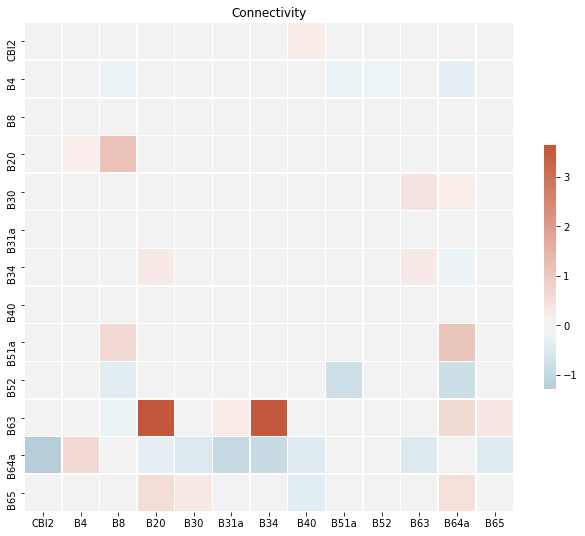

In [20]:
# Load true connectivity structure
true_conn = sio.loadmat('cpg.mat')['C']

# Plot true connectivity structure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(true_conn, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);
plt.xticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);

plt.title('Connectivity')

Text(0.5,1,'Estimated DI')

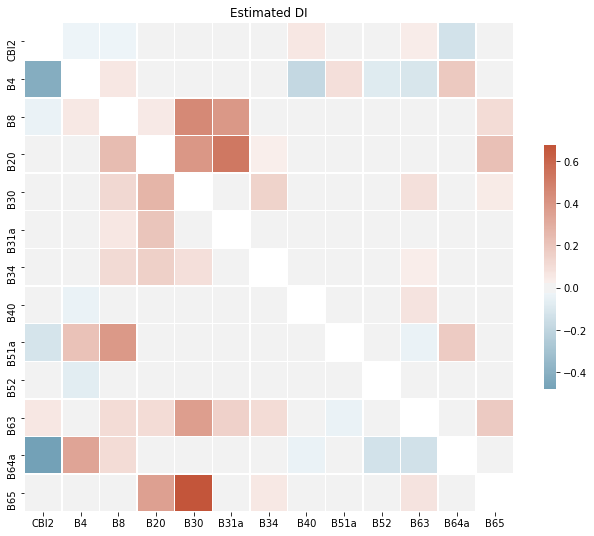

In [19]:
# Plot DI
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(DI_est_norm_signed, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);
plt.xticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);

plt.title('Estimated DI')

Text(0.5,1,'Estimated GDI')

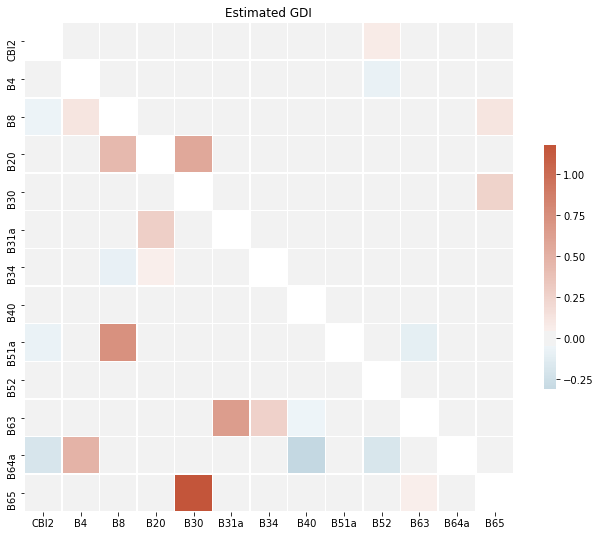

In [18]:
# Plot GDI
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(GDI_est_norm_signed, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);
plt.xticks(np.arange(binned_spikes.shape[1])+0.5,neuron_names);

plt.title('Estimated GDI')